In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade geoplot
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
import pandas as pd

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 7.3MB/s 
     |████████████████████████████████| 14.8MB 322kB/s 
     |████████████████████████████████| 225kB 2.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=b88ab27327a8a9eccc9ce4e25b69d01075ae43f81387c080f016155f925e53a7
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)
     |████████████████████████████████| 14.4MB 316kB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn

     |████████████████████████████████| 2.8MB 2.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702125 sha256=618c312c4b420695d5d707aaf2acf649ebf7acb9f3fc07565103251cb00043de
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
ERROR: geopandas 0.8.1 has requirement pyproj>=2.2.0, but you'll have pyproj 1.9.6 which is incompatible.
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [ ]:
!pip install --upgrade geopandas

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.1)
  Using cached https://files.pythonhosted.org/packages/e5/c3/071e080230ac4b6c64f1a2e2f9161c9737a2bc7b683d2c90b024825000c0/pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
from shapely.geometry import Point

from geopandas import GeoDataFrame

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder  # For categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
import pydot
import seaborn as sns
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/gdrive")

#df = pd.read_excel('https://drive.google.com/drive/my-drive/Global_Landslide_Catalog-Export.xlsx')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/Landslide data/Global_Landslide_Catalog-Export.xlsx')

In [ ]:
df.head(5)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,2014-04-01,2017-11-20 15:17:00,2018-02-15 15:51:00,123.8978,10.3336


In [ ]:
df.columns


Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                11033 non-null  object        
 1   source_link                10187 non-null  object        
 2   event_id                   11033 non-null  int64         
 3   event_date                 11033 non-null  datetime64[ns]
 4   event_time                 0 non-null      float64       
 5   event_title                11033 non-null  object        
 6   event_description          10171 non-null  object        
 7   location_description       10931 non-null  object        
 8   location_accuracy          11031 non-null  object        
 9   landslide_category         11032 non-null  object        
 10  landslide_trigger          11010 non-null  object        
 11  landslide_size             11024 non-null  object        
 12  land

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,event_time,11033,0.000000
1,notes,10716,2.873199
2,storm_name,10456,5.229765
3,photo_link,9537,13.559322
4,injury_count,5674,48.572464
5,admin_division_name,1637,85.162694
6,country_code,1564,85.824345
7,event_import_source,1563,85.833409
8,gazeteer_closest_point,1563,85.833409
9,admin_division_population,1562,85.842473


In [ ]:
df.shape # See how many data objects & attributes we have



(11033, 31)

In [ ]:
df.landslide_trigger.unique() # To get the distinct value for landslide_trigger column

array(['rain', 'downpour', 'monsoon', 'tropical_cyclone', 'unknown',
       'continuous_rain', 'dam_embankment_collapse',
       'no_apparent_trigger', nan, 'other', 'leaking_pipe',
       'construction', 'snowfall_snowmelt', 'mining', 'flooding',
       'earthquake', 'freeze_thaw', 'volcano', 'vibration'], dtype=object)

In [ ]:
#del df['event_time'] # Deleting event_time column has there was no any data in that column.

In [ ]:
############################### DATA PREPROCESSING ###############################
# In this section I performed data preprocessing by removing noise, replacing NaN
# values, replacing NaN/empty values with the median of that attribute and dropping
# columns that wouldn't help our model train
##################################################################################
# Remove unwanted columns
df = df.drop(columns=['event_title',
                      'event_id','event_description',
                      'gazeteer_closest_point', 'country_code','gazeteer_distance','last_edited_date'])

In [ ]:
df = df.dropna(subset=['landslide_trigger']) # remove null vrows of landslide_trigger

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,event_time,11010,0.000000
1,notes,10694,2.870118
2,storm_name,10433,5.240690
3,photo_link,9517,13.560400
4,injury_count,5672,48.483197
5,admin_division_name,1614,85.340599
6,event_import_source,1540,86.012716
7,event_import_id,1539,86.021798
8,country_name,1539,86.021798
9,admin_division_population,1539,86.021798


In [ ]:
# Remove unwanted columns
df = df.drop(columns=['notes',
                      'storm_name','photo_link'])

In [ ]:
# Replace NaN values in fatality & injury count with the medians
df['fatality_count'].fillna((df['fatality_count'].median()), inplace=True)
df['injury_count'].fillna((df['injury_count'].median()), inplace=True)
df.isnull().sum() # check for missing values in dataset

source_name                      0
source_link                    846
event_date                       0
event_time                   11010
location_description           101
location_accuracy                2
landslide_category               0
landslide_trigger                0
landslide_size                   6
landslide_setting               62
fatality_count                   0
injury_count                     0
event_import_source           1540
event_import_id               1539
country_name                  1539
admin_division_name           1614
admin_division_population     1539
submitted_date                  10
created_date                     1
longitude                        0
latitude                         0
dtype: int64

In [ ]:
df.landslide_size.unique()

array(['large', 'small', 'medium', 'unknown', 'very_large',
       'catastrophic', nan], dtype=object)

In [ ]:
#Delete attribute values that we don't want to classify:
df = df[df.landslide_size != "catastrophic"]
df = df[df.landslide_category != "unknown"]
df = df[df.landslide_category != "other"]
df = df[df.country_name != "NaN"]

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,event_time,10901,0.000000
1,admin_division_name,1607,85.258233
2,admin_division_population,1532,85.946243
3,country_name,1532,85.946243
4,event_import_source,1532,85.946243
5,event_import_id,1532,85.946243
6,source_link,842,92.275938
7,location_description,97,99.110173
8,landslide_setting,62,99.431245
9,submitted_date,10,99.908265


In [ ]:
df.landslide_size.unique()

array(['large', 'small', 'medium', 'unknown', 'very_large', nan],
      dtype=object)

In [ ]:
# replacing na values in college with No college 
df["landslide_size"].fillna("small", inplace = True)


In [ ]:
df = df.dropna(subset=['location_description']) 

In [ ]:
del df['landslide_setting']
del df['submitted_date']
del df['created_date']
# deleting redundant column as eventdate covers

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,event_time,10804,0.000000
1,admin_division_name,1591,85.273973
2,admin_division_population,1517,85.958904
3,country_name,1517,85.958904
4,event_import_id,1517,85.958904
5,event_import_source,1517,85.958904
6,source_link,841,92.215846
7,location_accuracy,2,99.981488
8,source_name,0,100.000000
9,injury_count,0,100.000000


In [ ]:
df["admin_division_name"].fillna("NoDIVISION", inplace = True)
df['admin_division_population'].fillna((df['admin_division_population'].median()), inplace=True)
df["event_import_source"].fillna("ABCSource", inplace = True)
df['event_import_id'].fillna((df['event_import_id'].median()), inplace=True)
df["source_link"].fillna("ABCLink", inplace = True)
df["location_accuracy"].fillna("1km", inplace = True)


downpour                   6239
rain                       2558
continuous_rain             737
tropical_cyclone            557
snowfall_snowmelt           133
monsoon                     126
mining                       87
earthquake                   84
construction                 79
flooding                     74
no_apparent_trigger          42
freeze_thaw                  40
other                        25
dam_embankment_collapse      12
leaking_pipe                 10
vibration                     1
Name: landslide_trigger, dtype: int64

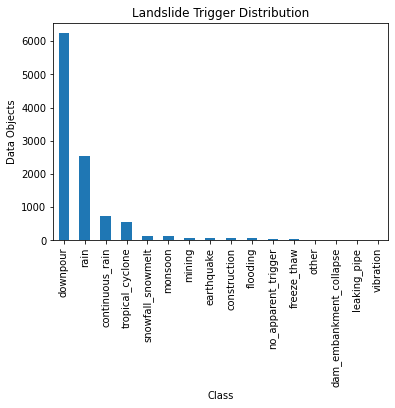

In [ ]:
# Print graph showing imbalanced data:
# Changing into approriate integer
df["landslide_trigger"].replace({"unknown": "downpour"}, inplace=True)
pd.value_counts(df['landslide_trigger']).plot.bar()
plt.title('Landslide Trigger Distribution')
plt.xlabel('Class')
plt.ylabel('Data Objects')
df['landslide_trigger'].value_counts()

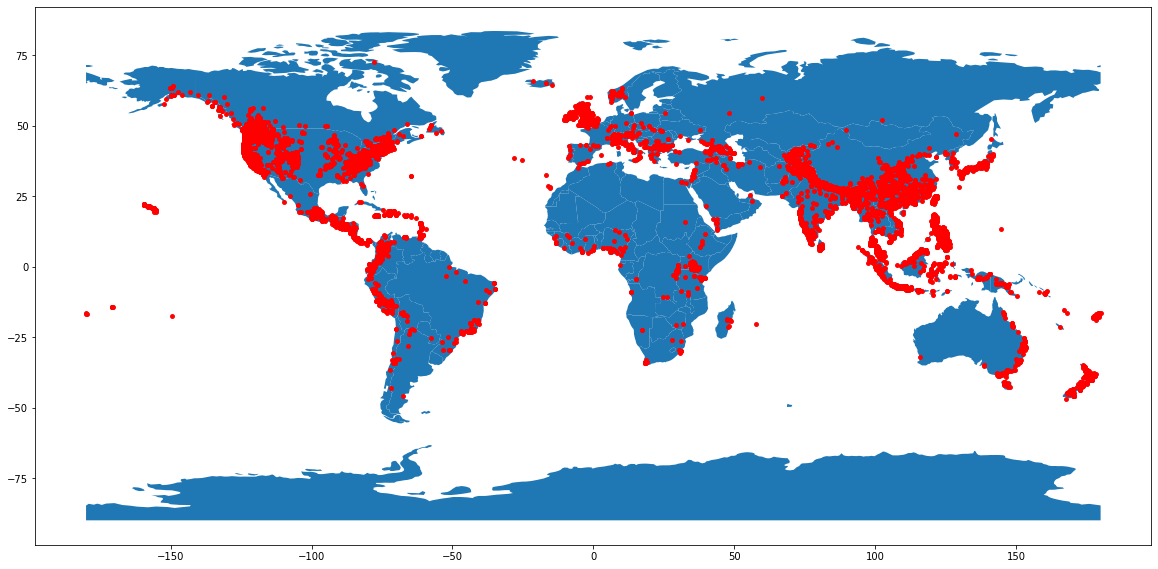

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 10)), marker='o', color='red', markersize=15);

In [ ]:
# Make sure all categorical data is string value only

df['landslide_category'] = df['landslide_category'].astype(str) 
df['country_name'] = df['country_name'].astype(str) #make sure all country name values are strings

In [ ]:
# Label Encode our categorical data with dummy variables
#df = pd.get_dummies(df, prefix=['country_name','landslide_category','landslide_size'], 
                    #columns=['country_name','landslide_category','landslide_size'])

In [ ]:
df['country_name'].nunique()
#there are 142 countries

142

In [ ]:
df['country_name'].value_counts()

United States            2948
nan                      1517
India                    1250
Philippines               665
Nepal                     477
                         ... 
Belize                      1
Mauritius                   1
Burkina Faso                1
Zambia                      1
Republic of the Congo       1
Name: country_name, Length: 142, dtype: int64

In [ ]:
df['country_name'].replace({'nan':'Country Unkown'}, inplace = True)

In [ ]:
count_countrywise = df['country_name'].value_counts()

In [ ]:
count_countrywise = count_countrywise.drop('Country Unkown', axis = 0)

In [ ]:

country_df = pd.DataFrame(count_countrywise)

In [ ]:
country_df = country_df.drop('Country Unkown', axis=0)

In [ ]:
country_df.rename(columns = {'country_name': 'Landslide_Count'}, inplace = True)

In [ ]:
top10_country= country_df.sort_values('Landslide_Count', ascending=False).head(10)

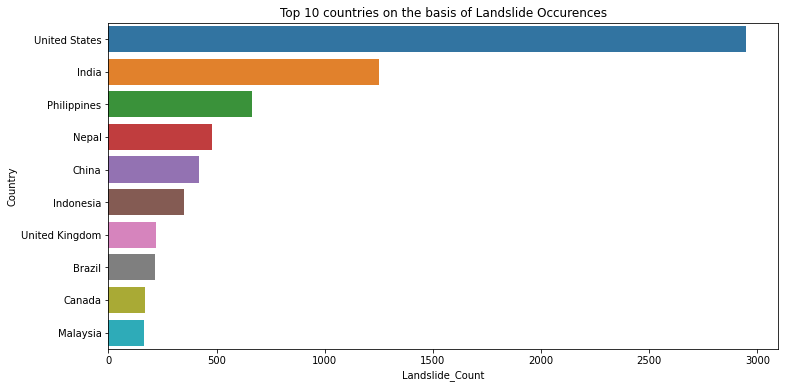

In [ ]:
plt.figure(figsize=(12,6))
plt.ylabel('Country')
#plt.xlabel('Number of Landslide Cases')
plt.title('Top 10 countries on the basis of Landslide Occurences')
sns.barplot(top10_country['Landslide_Count'], top10_country.index);

In [ ]:
#What are the top 10 countries with maximum landslide occurences?

In [ ]:
count_countrywise.head(10)

United States     2948
India             1250
Philippines        665
Nepal              477
China              419
Indonesia          349
United Kingdom     221
Brazil             214
Canada             167
Malaysia           166
Name: country_name, dtype: int64

In [ ]:
cols = ['landslide_size','landslide_category','country_name','landslide_trigger','fatality_count','injury_count','event_date']
df1 =pd.DataFrame(df, columns = cols)

In [ ]:
df1["country_name"] = df1["country_name"].astype('category')
df1["country_name"] = df1["country_name"].cat.codes

In [ ]:
df1.sample(5)

,landslide_size,landslide_category,country_name,landslide_trigger,fatality_count,injury_count,event_date
4342,medium,mudslide,105,downpour,0.0,0.0,2013-09-24
5303,medium,rock_fall,99,downpour,0.0,0.0,2010-08-30
1113,small,landslide,24,rain,0.0,0.0,2014-07-15
4801,small,riverbank_collapse,17,downpour,0.0,0.0,2013-12-13
6699,small,rock_fall,135,downpour,0.0,0.0,2016-01-27


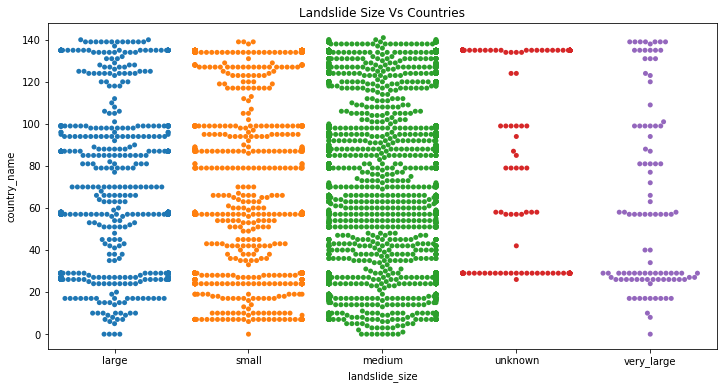

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Landslide Size Vs Countries')
sns.swarmplot(df1['landslide_size'], df1['country_name']);

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10804 entries, 0 to 11032
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   landslide_size      10804 non-null  object        
 1   landslide_category  10804 non-null  object        
 2   country_name        10804 non-null  int16         
 3   landslide_trigger   10804 non-null  object        
 4   fatality_count      10804 non-null  float64       
 5   injury_count        10804 non-null  float64       
 6   event_date          10804 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int16(1), object(3)
memory usage: 931.9+ KB


In [ ]:
#sns.barplot(df1['landslide_category'], df1['landslide_trigger']);

In [ ]:
df['landslide_trigger']

0                    rain
1                downpour
2                downpour
3                 monsoon
4        tropical_cyclone
               ...       
11028                rain
11029               other
11030            downpour
11031            downpour
11032        construction
Name: landslide_trigger, Length: 10804, dtype: object

In [ ]:
# Label Encode our trigger values into numbers
df["landslide_trigger"] = df["landslide_trigger"].astype('category')
df["landslide_trigger"] = df["landslide_trigger"].cat.codes
df.head(5)



,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province",unknown,landslide,12,large,11.0,0.0,glc,684.0,China,Shaanxi,0.0,107.4500,32.5625,POINT (107.45000 32.56250)
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",5km,mudslide,3,small,0.0,0.0,glc,956.0,United States,Oregon,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000)
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",10km,landslide,3,large,10.0,0.0,glc,973.0,Peru,Junín,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950)
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,2009-07-31 00:00:00,NaN,Dailekh district,unknown,landslide,9,medium,1.0,0.0,glc,1067.0,Nepal,Mid Western,20908.0,81.7080,28.8378,POINT (81.70800 28.83780)
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,5km,landslide,14,medium,0.0,0.0,glc,2603.0,Philippines,Central Visayas,798634.0,123.8978,10.3336,POINT (123.89780 10.33360)


Here we changed landslide trigger value that was string into int : Keep Note **rain= 12 , downpour= 3 , monsoon = 9 , tropical_cyclone = 14 ,....**

In [ ]:
df['location_accuracy'].unique()

array(['unknown', '5km', '10km', '25km', 'exact', '1km', '50km', '250km',
       '100km'], dtype=object)

In [ ]:
# Changing into approriate integer
df["location_accuracy"].replace({"unknown": "0", "5km": "5","10km":"10","25km":"25","exact":"0","1km":"1","50km":"50","250km":"250","100km":"100"}, inplace=True)

In [ ]:
df["location_accuracy"]

0         0
1         5
2        10
3         0
4         5
         ..
11028     5
11029     5
11030     1
11031     1
11032     1
Name: location_accuracy, Length: 10804, dtype: object

In [ ]:
# Label Encode our divisioname values into numbers
df["admin_division_name"] = df["admin_division_name"].astype('category')
df["admin_division_name"] = df["admin_division_name"].cat.codes


# Label Encode our event_import_sourcer values into numbers
df["event_import_source"] = df["event_import_source"].astype('category')
df["event_import_source"] = df["event_import_source"].cat.codes


# Label Encode our source_link values into numbers
df["source_link"] = df["source_link"].astype('category')
df["source_link"] = df["source_link"].cat.codes


# Label Encode our Location Description values into numbers
df["location_description"] = df["location_description"].astype('category')
df["location_description"] = df["location_description"].cat.codes
df.head(5)

# Label Encode our SourceName values into numbers
df["source_name"] = df["source_name"].astype('category')
df["source_name"] = df["source_name"].cat.codes

# Label Encode our Locationaccuracy values into numbers
df["location_accuracy"] = df["location_accuracy"].astype('category')
df["location_accuracy"] = df["location_accuracy"].cat.codes
df.head(5)


,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry
0,85,7753,2008-08-01 00:00:00,NaN,7788,0,landslide,12,large,11.0,0.0,2,684.0,China,685,0.0,107.4500,32.5625,POINT (107.45000 32.56250)
1,1391,5580,2009-01-02 02:00:00,NaN,4586,6,mudslide,3,small,0.0,0.0,2,956.0,United States,552,36619.0,-122.6630,45.4200,POINT (-122.66300 45.42000)
2,279,7952,2007-01-19 00:00:00,NaN,7492,2,landslide,3,large,10.0,0.0,2,973.0,Peru,326,14708.0,-75.3587,-11.1295,POINT (-75.35870 -11.12950)
3,1529,7783,2009-07-31 00:00:00,NaN,2204,0,landslide,9,medium,1.0,0.0,2,1067.0,Nepal,453,20908.0,81.7080,28.8378,POINT (81.70800 28.83780)
4,1782,5684,2010-10-16 12:00:00,NaN,10130,6,landslide,14,medium,0.0,0.0,2,2603.0,Philippines,128,798634.0,123.8978,10.3336,POINT (123.89780 10.33360)


In [ ]:
df['location_description'].value_counts()

2525    14
3247    11
6267     9
8876     8
6156     7
        ..
8769     1
4671     1
6718     1
573      1
0        1
Name: location_description, Length: 10316, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10804 entries, 0 to 11032
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                10804 non-null  int16         
 1   source_link                10804 non-null  int16         
 2   event_date                 10804 non-null  datetime64[ns]
 3   event_time                 0 non-null      float64       
 4   location_description       10804 non-null  int16         
 5   location_accuracy          10804 non-null  int8          
 6   landslide_category         10804 non-null  object        
 7   landslide_trigger          10804 non-null  int8          
 8   landslide_size             10804 non-null  object        
 9   fatality_count             10804 non-null  float64       
 10  injury_count               10804 non-null  float64       
 11  event_import_source        10804 non-null  int8          
 12  even

In [ ]:
df['landslide_trigger'].dtype

dtype('int8')

In [ ]:
df['source_name'].dtypes

dtype('int16')

In [ ]:
df.dtypes

source_name                           int16
source_link                           int16
event_date                   datetime64[ns]
event_time                          float64
location_description                  int16
location_accuracy                      int8
landslide_category                   object
landslide_trigger                      int8
landslide_size                       object
fatality_count                      float64
injury_count                        float64
event_import_source                    int8
event_import_id                     float64
country_name                         object
admin_division_name                   int16
admin_division_population           float64
longitude                           float64
latitude                            float64
geometry                           geometry
dtype: object

In [ ]:
##df['geometry'] #drop this #graphs plot garna milcha
#event date 

In [ ]:
#Geometry info
#sns.scatterplot(x = 'geometry', y = lan

In [ ]:
df.sample(3)

,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry
7338,2229,38,2010-12-22,NaN,2009,2,complex,3,small,0.0,0.0,2,2881.0,United States,109,53104.0,-117.1906,34.1358,POINT (-117.19060 34.13580)
3388,639,3691,2015-06-20,NaN,801,0,landslide,1,small,0.0,0.0,2,6944.0,Bulgaria,583,340494.0,24.7502,42.1436,POINT (24.75020 42.14360)
7073,1506,5852,2007-10-17,NaN,9789,4,mudslide,12,medium,0.0,0.0,2,314.0,Jamaica,652,2382.0,-76.3500,17.9500,POINT (-76.35000 17.95000)


In [ ]:
df.columns

Index(['source_name', 'source_link', 'event_date', 'event_time',
       'location_description', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'fatality_count', 'injury_count',
       'event_import_source', 'event_import_id', 'country_name',
       'admin_division_name', 'admin_division_population', 'longitude',
       'latitude', 'geometry'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10804 entries, 0 to 11032
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   source_name                10804 non-null  int16         
 1   source_link                10804 non-null  int16         
 2   event_date                 10804 non-null  datetime64[ns]
 3   event_time                 0 non-null      float64       
 4   location_description       10804 non-null  int16         
 5   location_accuracy          10804 non-null  int8          
 6   landslide_category         10804 non-null  object        
 7   landslide_trigger          10804 non-null  int8          
 8   landslide_size             10804 non-null  object        
 9   fatality_count             10804 non-null  float64       
 10  injury_count               10804 non-null  float64       
 11  event_import_source        10804 non-null  int8          
 12  even

In [ ]:
df.head(2)

,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry
0,85,7753,2008-08-01 00:00:00,NaN,7788,0,landslide,12,large,11.0,0.0,2,684.0,China,685,0.0,107.450,32.5625,POINT (107.45000 32.56250)
1,1391,5580,2009-01-02 02:00:00,NaN,4586,6,mudslide,3,small,0.0,0.0,2,956.0,United States,552,36619.0,-122.663,45.4200,POINT (-122.66300 45.42000)


In [ ]:
df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_week'] = df['event_date'].dt.week
df['event_day'] = df['event_date'].dt.day
#df['event_date_hour'] = df['event_date'].dt.hour
#df['event_date_minute'] = df['event_date'].dt.minute
#df['event_Date'] = df['event_date'].dt.date'''

In [ ]:
import datetime as dt


In [ ]:
df['event_year']

0        2008
1        2009
2        2007
3        2009
4        2010
         ... 
11028    2017
11029    2017
11030    2016
11031    2017
11032    2017
Name: event_year, Length: 10804, dtype: int64

In [ ]:
df_by_year = df.sort_values('event_year');

In [ ]:
df_by_year = df_by_year.set_index('event_year')

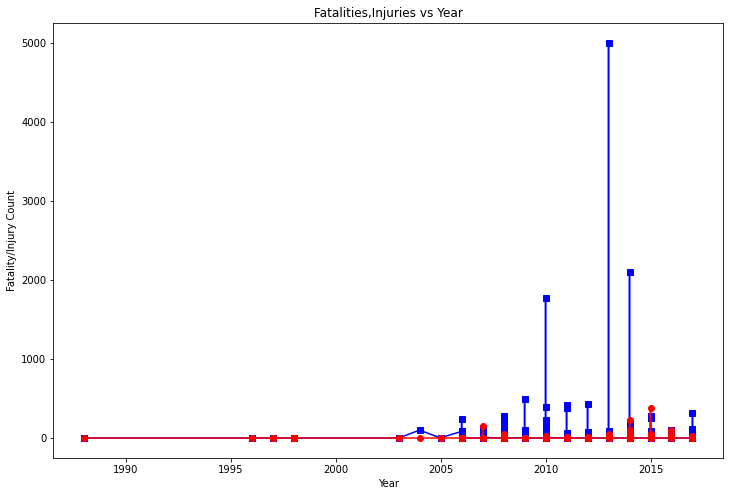

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Fatalities,Injuries vs Year')
plt.xlabel('Year')
plt.ylabel('Fatality/Injury Count')
plt.plot( df_by_year.index, df_by_year['fatality_count'], 's-b')
plt.plot( df_by_year.index, df_by_year['injury_count'], 'o-r');


In [ ]:
df.sample(2)

,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,event_year,event_month,event_week,event_day
6931,3534,2476,2013-07-21,NaN,1560,6,landslide,12,medium,0.0,0.0,2,5152.0,Philippines,512,3232.0,123.8654,10.2976,POINT (123.86540 10.29760),2013,7,29,21
4037,869,6869,2014-12-04,NaN,6462,4,landslide,12,medium,0.0,0.0,2,6439.0,Indonesia,123,92990.0,109.7856,-7.3196,POINT (109.78560 -7.31960),2014,12,49,4


In [ ]:
df['landslide_category'].unique()

array(['landslide', 'mudslide', 'complex', 'rock_fall', 'debris_flow',
       'riverbank_collapse', 'lahar', 'snow_avalanche', 'creep',
       'earth_flow', 'translational_slide', 'topple'], dtype=object)

In [ ]:
col22 = ['admin_division_population', 'country_name','fatality_count']
df33 = pd.DataFrame(df, columns = col22)

In [ ]:
df33.head(3)

,admin_division_population,country_name,fatality_count
0,0.0,China,11.0
1,36619.0,United States,0.0
2,14708.0,Peru,10.0


In [ ]:
dfpop = df33.groupby('country_name')[['admin_division_population','fatality_count']].sum()

In [ ]:
dfpop.sample(5)

,admin_division_population,fatality_count
country_name,,
Guinea,86853.0,42.0
Saint Vincent and the Grenadines,6860.0,5.0
Cameroon,2066194.0,0.0
Kenya,2314898.0,120.0
Mexico,34056586.0,322.0


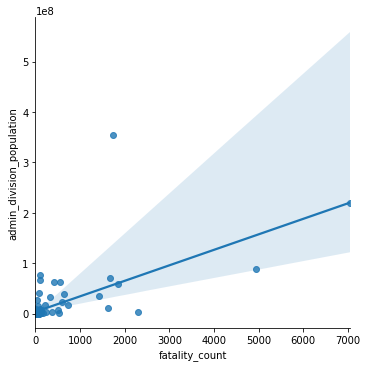

In [ ]:

sns.lmplot(y ='admin_division_population', x = 'fatality_count', data = dfpop);

In [ ]:
#country vs fatality count
col1 = ['country_name','landslide_category', 'landslide_trigger','landslide_size','fatality_count', 'injury_count','admin_division_population','event_year' ]
df2 = pd.DataFrame(df, columns = col1)

In [ ]:
#df2 = df2.drop('Country Unkown', axis = 0);

KeyError: ignored

In [ ]:
#country vs fatality count
CbyF = df2.groupby('country_name')[['fatality_count']].sum()

In [ ]:
Countrydeath_count = CbyF.sort_values('fatality_count', ascending = False).head(21)

In [ ]:
Countrydeath_count = Countrydeath_count.drop('Country Unkown', axis = 0)

In [ ]:
#Which countries have the maximum reported deaths?
Countrydeath_count.head(10)
#the below list shows the 10 countries with maximum deaths

,fatality_count
country_name,
India,7058.0
China,4930.0
Afghanistan,2287.0
Philippines,1839.0
Brazil,1743.0
Indonesia,1676.0
Nepal,1432.0
Guatemala,735.0
Pakistan,643.0


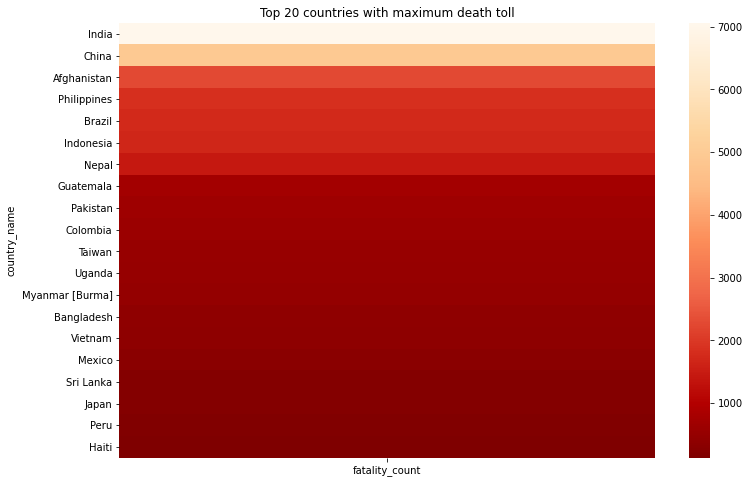

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 20 countries with maximum death toll')
sns.heatmap(Countrydeath_count, cmap = 'OrRd_r');

In [ ]:
#country vs injury
CbyI = df2.groupby('country_name')[['injury_count']].sum()

In [ ]:
Countryinjury_count = CbyI.sort_values('injury_count', ascending = False).head(20)

In [ ]:
Countryinjury_count = Countryinjury_count.drop('Country Unkown', axis = 0)

In [ ]:
Countryinjury_count.head(10)
#the list below shows the top 10 countries that had maximum injuries

,injury_count
country_name,
Guatemala,393.0
China,313.0
Peru,277.0
Nepal,257.0
Myanmar [Burma],228.0
India,215.0
Bangladesh,170.0
Indonesia,147.0
Philippines,138.0


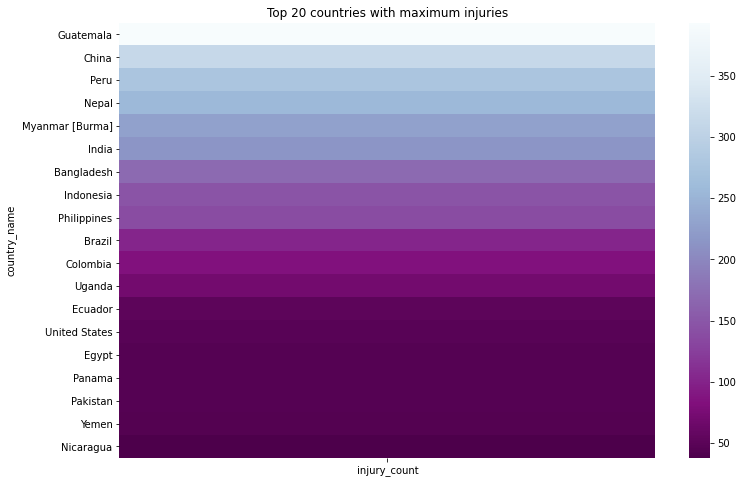

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 20 countries with maximum injuries')
sns.heatmap(Countryinjury_count, cmap = 'BuPu_r');

In [ ]:
'''plt.figure(figsize=(12,6))
plt.title('Fatalities over the years')
sns.barplot( df_by_year.index, df_by_year['fatality_count']);'''

"plt.figure(figsize=(12,6))\nplt.title('Fatalities over the years')\nsns.barplot( df_by_year.index, df_by_year['fatality_count']);"

In [ ]:
#df['event_date_year']

In [ ]:
# Split our labels into their own array
#Here Our Target class :  landslide trigger 
#Y = np.array(df['landslide_trigger'])  # values we want to predict

In [ ]:
# Remove the labels from the features, axis 1 refers to the col
#df = df.drop('landslide_trigger',axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10804 entries, 0 to 11032
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   landslide_size      10804 non-null  object        
 1   landslide_category  10804 non-null  object        
 2   country_name        10804 non-null  int16         
 3   landslide_trigger   10804 non-null  int8          
 4   fatality_count      10804 non-null  float64       
 5   injury_count        10804 non-null  float64       
 6   event_date          10804 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int16(1), int8(1), object(2)
memory usage: 858.1+ KB


In [ ]:
df1.landslide_size.unique()

array(['large', 'small', 'medium', 'unknown', 'very_large'], dtype=object)

In [ ]:
df.location_description.dtype

dtype('int16')

In [ ]:
df2.head(2)

,country_name,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,admin_division_population,event_year
0,China,landslide,12,large,11.0,0.0,0.0,2008
1,United States,mudslide,3,small,0.0,0.0,36619.0,2009


In [ ]:
df2.admin_division_population.dtype

dtype('float64')

In [ ]:
#plt.plot(df2.admin_division_population, df2.injury_count);
#g = sns.catplot("alive", col="deck", col_wrap=4,
                #data=titanic[titanic.deck.notnull()],
                #kind="count", height=3.5, aspect=.8, 
                #palette='tab20')

#fig.suptitle('sf')
df.plot(kind='pie', subplots=True, figsize=(8, 8), dpi= 80)

In [ ]:
df2.head(2)

,country_name,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,admin_division_population,event_year
0,China,landslide,12,large,11.0,0.0,0.0,2008
1,United States,mudslide,3,small,0.0,0.0,36619.0,2009


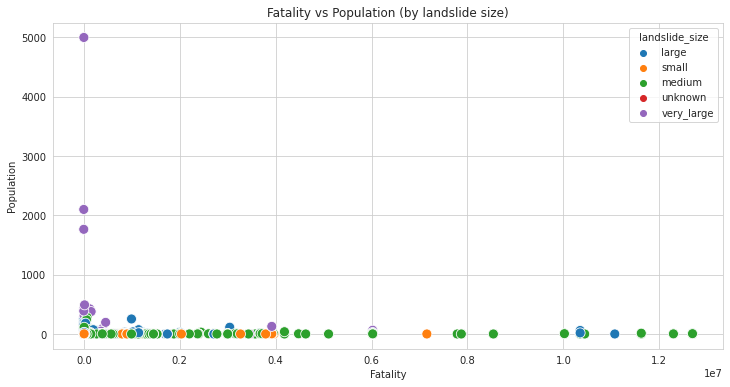

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df2['admin_division_population'], df2['fatality_count'], hue = df2['landslide_size'], s = 100)
plt.title('Fatality vs Population (by landslide size)')
plt.xlabel('Fatality')
plt.ylabel('Population');

In [ ]:
dfyearr = pd.DataFrame(df, columns = ['event_year','fatality_count'])

In [ ]:
dfdeath_year = dfyearr.sort_values('event_year')

In [ ]:
dfdeath_year.head(3)

,event_year,fatality_count
9599,1988,0.0
2078,1996,0.0
3716,1996,0.0


In [ ]:
deathyear_df = dfyearr.groupby('event_year').sum()

In [ ]:
deathyear_df.head(20)

,fatality_count
event_year,
1988,0.0
1996,0.0
1997,0.0
1998,0.0
2003,0.0
2004,100.0
2005,3.0
2006,324.0
2007,1734.0


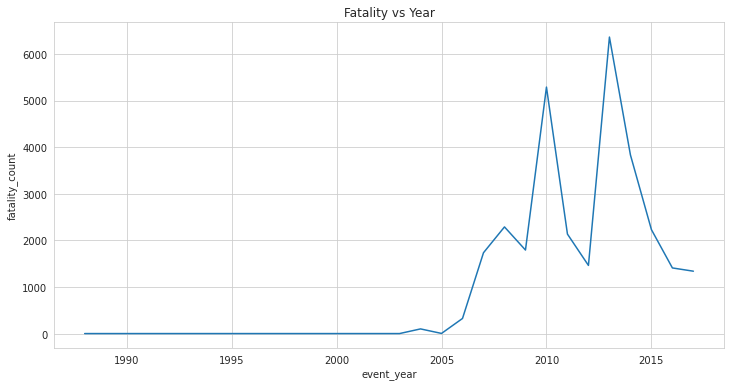

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(deathyear_df.index, deathyear_df['fatality_count'])
plt.title('Fatality vs Year');

In [ ]:
dfdeath_year.set_index('event_year')

,fatality_count
event_year,
1988,0.0
1996,0.0
1996,0.0
1997,0.0
1997,0.0
...,...
2017,0.0
2017,0.0
2017,0.0


In [ ]:
#sns.barplot(dfdeath_year.index, dfdeath_year.fatality_count);

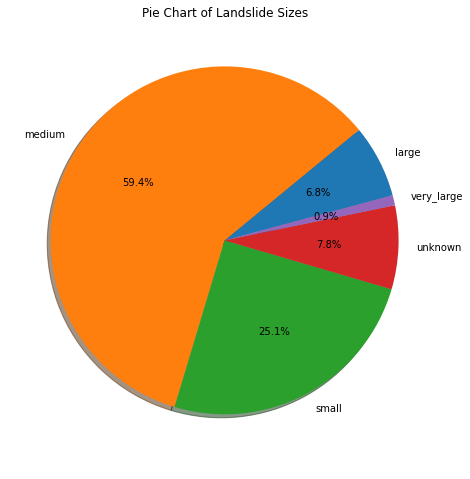

In [ ]:
df3 = df2.groupby('landslide_size').size()

df3.plot(kind = 'pie', subplots = True, figsize =(8,8), autopct='%1.1f%%', startangle=15, shadow = True); #colors = my_colors);
plt.title("Pie Chart of Landslide Sizes")
plt.xlabel(" ")
plt.ylabel('');


In [ ]:
df_by_year.head(3)

,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,event_month,event_week,event_day
event_year,,,,,,,,,,,,,,,,,,,,,,
1988,1433,1610,1988-11-07,NaN,8099,4,landslide,1,medium,0.0,0.0,2,6436.0,Philippines,82,10531.0,123.0319,13.5107,POINT (123.03190 13.51070),11,45,7
1996,2013,1168,1996-12-26,NaN,9263,7,debris_flow,6,small,0.0,0.0,2,7831.0,United States,552,1144.0,-122.0991,45.5775,POINT (-122.09910 45.57750),12,52,26
1996,2013,1168,1996-12-26,NaN,9263,7,debris_flow,6,small,0.0,0.0,2,7830.0,United States,552,14095.0,-122.1828,45.5492,POINT (-122.18280 45.54920),12,52,26


In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
from dateutil.parser import parse

In [ ]:
df_by_year['event_date']

event_year
1988   1988-11-07 00:00:00
1996   1996-12-26 00:00:00
1996   1996-12-26 00:00:00
1997   1997-01-19 00:00:00
1997   1997-01-19 00:00:00
               ...        
2017   2017-01-06 18:08:00
2017   2017-01-22 21:52:00
2017   2017-01-26 20:56:00
2017   2017-01-31 21:54:00
2017   2017-03-13 14:32:00
Name: event_date, Length: 10804, dtype: datetime64[ns]

In [ ]:
df_by_year.set_index('event_date', inplace=True)

In [ ]:
pip install calmap

In [ ]:
import calmap

In [ ]:
df_by_year.head(2)

,source_name,source_link,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,event_month,event_week,event_day
event_date,,,,,,,,,,,,,,,,,,,,,
1988-11-07,1433,1610,NaN,8099,4,landslide,1,medium,0.0,0.0,2,6436.0,Philippines,82,10531.0,123.0319,13.5107,POINT (123.03190 13.51070),11,45,7
1996-12-26,2013,1168,NaN,9263,7,debris_flow,6,small,0.0,0.0,2,7831.0,United States,552,1144.0,-122.0991,45.5775,POINT (-122.09910 45.57750),12,52,26


,Landslide_Count
United States,2948
India,1250


In [ ]:
df['event_year'] = pd.DatetimeIndex(df.event_date).year

In [ ]:
df_by_year['eventyear']= df['event_year']

In [ ]:
colss = ['event_date','event_day','event_week','event_month','event_year','fatality_count','injury_count']
df_time = pd.DataFrame(df_by_year, columns = colss)

In [ ]:
df_time.head(3)

,event_date,event_day,event_week,event_month,event_year,fatality_count,injury_count
event_date,,,,,,,
1988-11-07,NaN,7,45,11,NaN,0.0,0.0
1996-12-26,NaN,26,52,12,NaN,0.0,0.0
1996-12-26,NaN,26,52,12,NaN,0.0,0.0


In [ ]:
#plt.figure(figsize=(16,10), dpi= 80)
#calmap.calendarplot(df_time['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
#plt.show()

In [ ]:
df_time

,event_date,event_day,event_week,event_month,fatality_count,injury_count
event_date,,,,,,
1988-11-07 00:00:00,NaN,7,45,11,0.0,0.0
1996-12-26 00:00:00,NaN,26,52,12,0.0,0.0
1996-12-26 00:00:00,NaN,26,52,12,0.0,0.0
1997-01-19 00:00:00,NaN,19,3,1,0.0,0.0
1997-01-19 00:00:00,NaN,19,3,1,0.0,0.0
...,...,...,...,...,...,...
2017-01-06 18:08:00,NaN,6,1,1,0.0,0.0
2017-01-22 21:52:00,NaN,22,3,1,0.0,0.0
2017-01-26 20:56:00,NaN,26,4,1,0.0,0.0


In [ ]:
df_month = df_time.groupby('event_month')[['fatality_count','injury_count']].count()

,source_name,source_link,event_date,event_time,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,injury_count,event_import_source,event_import_id,country_name,admin_division_name,admin_division_population,longitude,latitude,geometry,event_year,event_month,event_week,event_day
0,85,7753,2008-08-01 00:00:00,NaN,7788,0,landslide,12,large,11.0,0.0,2,684.0,China,685,0.0,107.450,32.5625,POINT (107.45000 32.56250),2008,8,31,1
1,1391,5580,2009-01-02 02:00:00,NaN,4586,6,mudslide,3,small,0.0,0.0,2,956.0,United States,552,36619.0,-122.663,45.4200,POINT (-122.66300 45.42000),2009,1,1,2


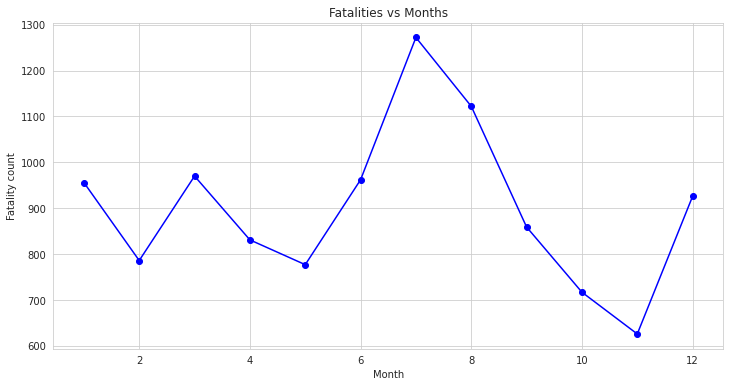

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_month.index, df_month['fatality_count'], 'o-b')
plt.title('Fatalities vs Months');
plt.xlabel('Month')
#plt.grid(False)
plt.ylabel('Fatality count');

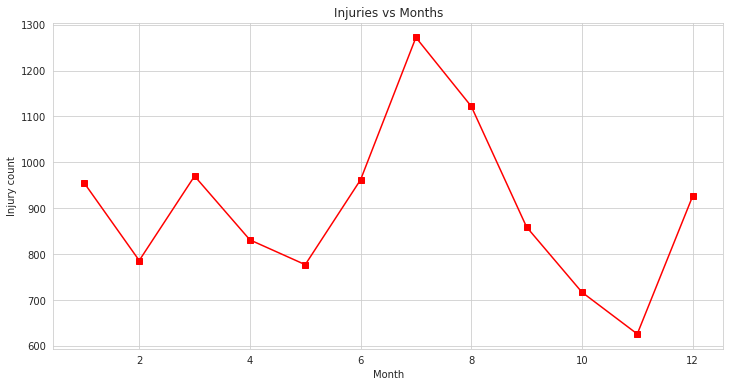

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_month.index, df_month['injury_count'], 's-r')
plt.title('Injuries vs Months');
plt.xlabel('Month')
#plt.grid(False)
plt.ylabel('Injury count');